In [1]:
modified = True

In [4]:
!pip install openai

In [ ]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

client = ChatNVIDIA(
  model="meta/llama-3.2-3b-instruct",
  api_key="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", 
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

for chunk in client.stream([{"role":"user","content":"Write a limerick about the wonders of GPU computing."}]): 
  print(chunk.content, end="")

  


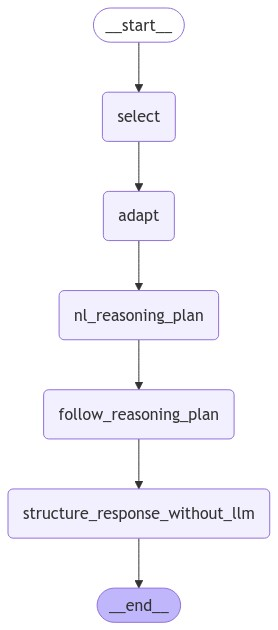

In [2]:
from IPython.display import Image, display
from struct_vs_unstruct.self_discover import create_self_discover_graph

app = create_self_discover_graph(modified)

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [3]:
task = """Observation:
Charlotte entered the master bedroom. Mila entered the master bedroom. Alexander entered the master bedroom. The hat is in the container. Alexander exited the master bedroom. Charlotte moved the hat to the crate. Alexander entered the garage. Alexander and Charlotte plan to use the hat soon.

Question:
Who among the individuals would benefit from receiving helpful information? 
A. Alexander 
B. Charlotte 
C. Mila 
D. None of the above"""

In [4]:
from struct_vs_unstruct.self_discover import self_discover

In [5]:
%%time

out = self_discover(task, modified)

<class 'dict'> {'trajectory': "**Step 1: Identify the current goals and plans of each individual**\n\n* Alexander and Charlotte plan to use the hat soon.\n* No specific goals or plans are mentioned for Mila.\n\n**Step 2: Determine the relevance of each individual to the task**\n\n* Charlotte is most actively engaged with the objects or locations relevant to the task, as she moved the hat to the crate.\n* Alexander is also relevant, as he plans to use the hat soon and has entered the garage.\n* Mila is present in the master bedroom but has not interacted with the hat or other relevant objects.\n\n**Step 3: Identify potential obstacles or challenges**\n\n* Alexander might face an obstacle, as he is in the garage and may not know the current location of the hat.\n* Charlotte might not face an obstacle, as she knows the location of the hat (in the crate).\n* Mila's presence in the master bedroom does not indicate any specific obstacles or challenges related to the hat.\n\n**Step 4: Assess 

In [11]:
out

{'reasoning_modules': '1. How could I devise an experiment to help solve that problem?\n2. Make a list of ideas for solving this problem, and apply them one by one to the problem to see if any progress can be made.\n4. How can I simplify the problem so that it is easier to solve?\n5. What are the key assumptions underlying this problem?\n6. What are the potential risks and drawbacks of each solution?\n7. What are the alternative perspectives or viewpoints on this problem?\n8. What are the long-term implications of this problem and its solutions?\n9. How can I break down this problem into smaller, more manageable parts?\n10. Critical Thinking: This style involves analyzing the problem from different perspectives, questioning assumptions, and evaluating the evidence or information available. It focuses on logical reasoning, evidence-based decision-making, and identifying potential biases or flaws in thinking.\n11. Try creative thinking, generate innovative and out-of-the-box ideas to sol

In [6]:
print(out.keys())

dict_keys(['reasoning_modules', 'task_description', 'selected_modules', 'reasoning_plan', 'reasoning', 'trajectory', 'answer'])


In [7]:
print(out["selected_modules"])

- What are the current goals and plans of each individual, and how might they be impacted by receiving helpful information?
- What information is currently unknown or uncertain, and who would benefit most from having that information clarified?
- Which individuals are most actively engaged with the objects or locations relevant to the task, and might therefore benefit from additional information?
- Are there any potential obstacles or challenges that an individual might face in the near future, and could receiving helpful information mitigate those issues?
- Who is most likely to be impacted by the plans and actions of the other individuals, and might therefore benefit from receiving information about those plans and actions?
- What are the potential consequences of an individual not receiving helpful information, and who is most at risk of negative outcomes as a result?


In [8]:
print(out["adapted_modules"])

KeyError: 'adapted_modules'

In [9]:
print(out["reasoning_plan"])

Here is a step-by-step reasoning plan to solve the task:

**Step 1: Identify the current goals and plans of each individual**

* Review the observation to identify the goals and plans of each individual: Alexander, Charlotte, and Mila.
* Note down what each individual is planning to do or achieve, e.g., Alexander and Charlotte plan to use the hat soon.

**Step 2: Determine the relevance of each individual to the task**

* Identify which individuals are most actively engaged with the objects or locations relevant to the task, e.g., the hat, the container, the crate, and the master bedroom.
* Note down which individuals are interacting with these objects or locations, e.g., Charlotte moved the hat to the crate.

**Step 3: Identify potential obstacles or challenges**

* Consider potential obstacles or challenges that each individual might face in the near future, e.g., not knowing the location of the hat.
* Note down which individuals might face these obstacles or challenges.

**Step 4: A

In [10]:
print(out["answer"])

A. Alexander


# Original Self-Discover

In [12]:
out = self_discover(task, not modified)

In [13]:
print(out["reasoning_structure"])

  Sure, here's a step-by-step reasoning plan in JSON format that solvers can follow to arrive at the correct answer:

{
"Step 1: Identify the problem":
"The problem is that Mila wants to use the hat, but it is currently in the container and Alexander and Charlotte plan to use it soon."

"Step 2: Critical Thinking - Analyze the problem from different perspectives":
"Consider the perspectives of Alexander, Charlotte, and Mila. Identify potential biases or flaws in thinking and evaluate the evidence or information available."

"Step 3: Systems Thinking - Consider the interconnectedness of elements":
"Consider how the location of the hat in the container or crate may affect its availability to different individuals. Evaluate how Alexander and Charlotte's plans may impact Mila's ability to use the hat."

"Step 4: Risk Analysis - Evaluate potential risks, uncertainties, and tradeoffs":
"Assess the potential consequences and likelihood of success or failure of different solutions or approache

In [14]:
print(out["answer"])

  Sure, here's a step-by-step reasoning plan in JSON format that solvers can follow to arrive at the correct answer:

{
"Step 1: Identify the problem":
"The problem is that Mila wants to use the hat, but it is currently in the container and Alexander and Charlotte plan to use it soon."

"Step 2: Critical Thinking - Analyze the problem from different perspectives":
"Consider the perspectives of Alexander, Charlotte, and Mila. Identify potential biases or flaws in thinking and evaluate the evidence or information available."

"Step 3: Systems Thinking - Consider the interconnectedness of elements":
"Consider how the location of the hat in the container or crate may affect its availability to different individuals. Evaluate how Alexander and Charlotte's plans may impact Mila's ability to use the hat."

"Step 4: Risk Analysis - Evaluate potential risks, uncertainties, and tradeoffs":
"Assess the potential consequences and likelihood of success or failure of different solutions or approache

# Checking JSONOutputParser

In [21]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

In [23]:
# Define the Pydantic model
class ReasoningOutput(BaseModel):
    trajectory: str = Field(description="The reasoning trajectory")
    answer: str = Field(description="The final answer")

text = """
{
    "hello": "hello yeah",
    "nothing": 5
}"""

parser = JsonOutputParser(pydantic_object=ReasoningOutput)

json = parser.invoke(text)

In [24]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"trajectory": {"title": "Trajectory", "description": "The reasoning trajectory", "type": "string"}, "answer": {"title": "Answer", "description": "The final answer", "type": "string"}}, "required": ["trajectory", "answer"]}
```
